<a href="https://colab.research.google.com/github/Mihai5469/PCTO23-24_2/blob/main/es4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #creazione grafici statiscici
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('heart_disease.csv')

In [6]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [21]:
#quanti valori sono nulli nelle colone
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [23]:
#cancela la colona education perche ha un'influenza molto minore in questa predizione
data = df.drop(['education'],axis = 1)
data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [24]:
#Calcolo dei valori medi di alcune colone de DataFrame
mean_cigsPerDay = round(data['cigsPerDay'].mean())
mean_BPMeds = round(data['BPMeds'].mean())
mean_totChol = round(data['totChol'].mean())
mean_BMI = round(data['BMI'].mean())
mean_glucose = round(data['glucose'].mean())
mean_heartRate = round(data['heartRate'].mean())

In [25]:
#sostituire i valore mancanti con i valori medi
data['cigsPerDay'].fillna(mean_cigsPerDay, inplace=True)
data['BPMeds'].fillna(mean_BPMeds, inplace=True)
data['totChol'].fillna(mean_totChol, inplace=True)
data['BMI'].fillna(mean_BMI, inplace=True)
data['glucose'].fillna(mean_glucose, inplace=True)
data['heartRate'].fillna(mean_heartRate, inplace=True)

In [26]:
#Assicurasi che tutti i valori mancanti siano riempiti
data.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

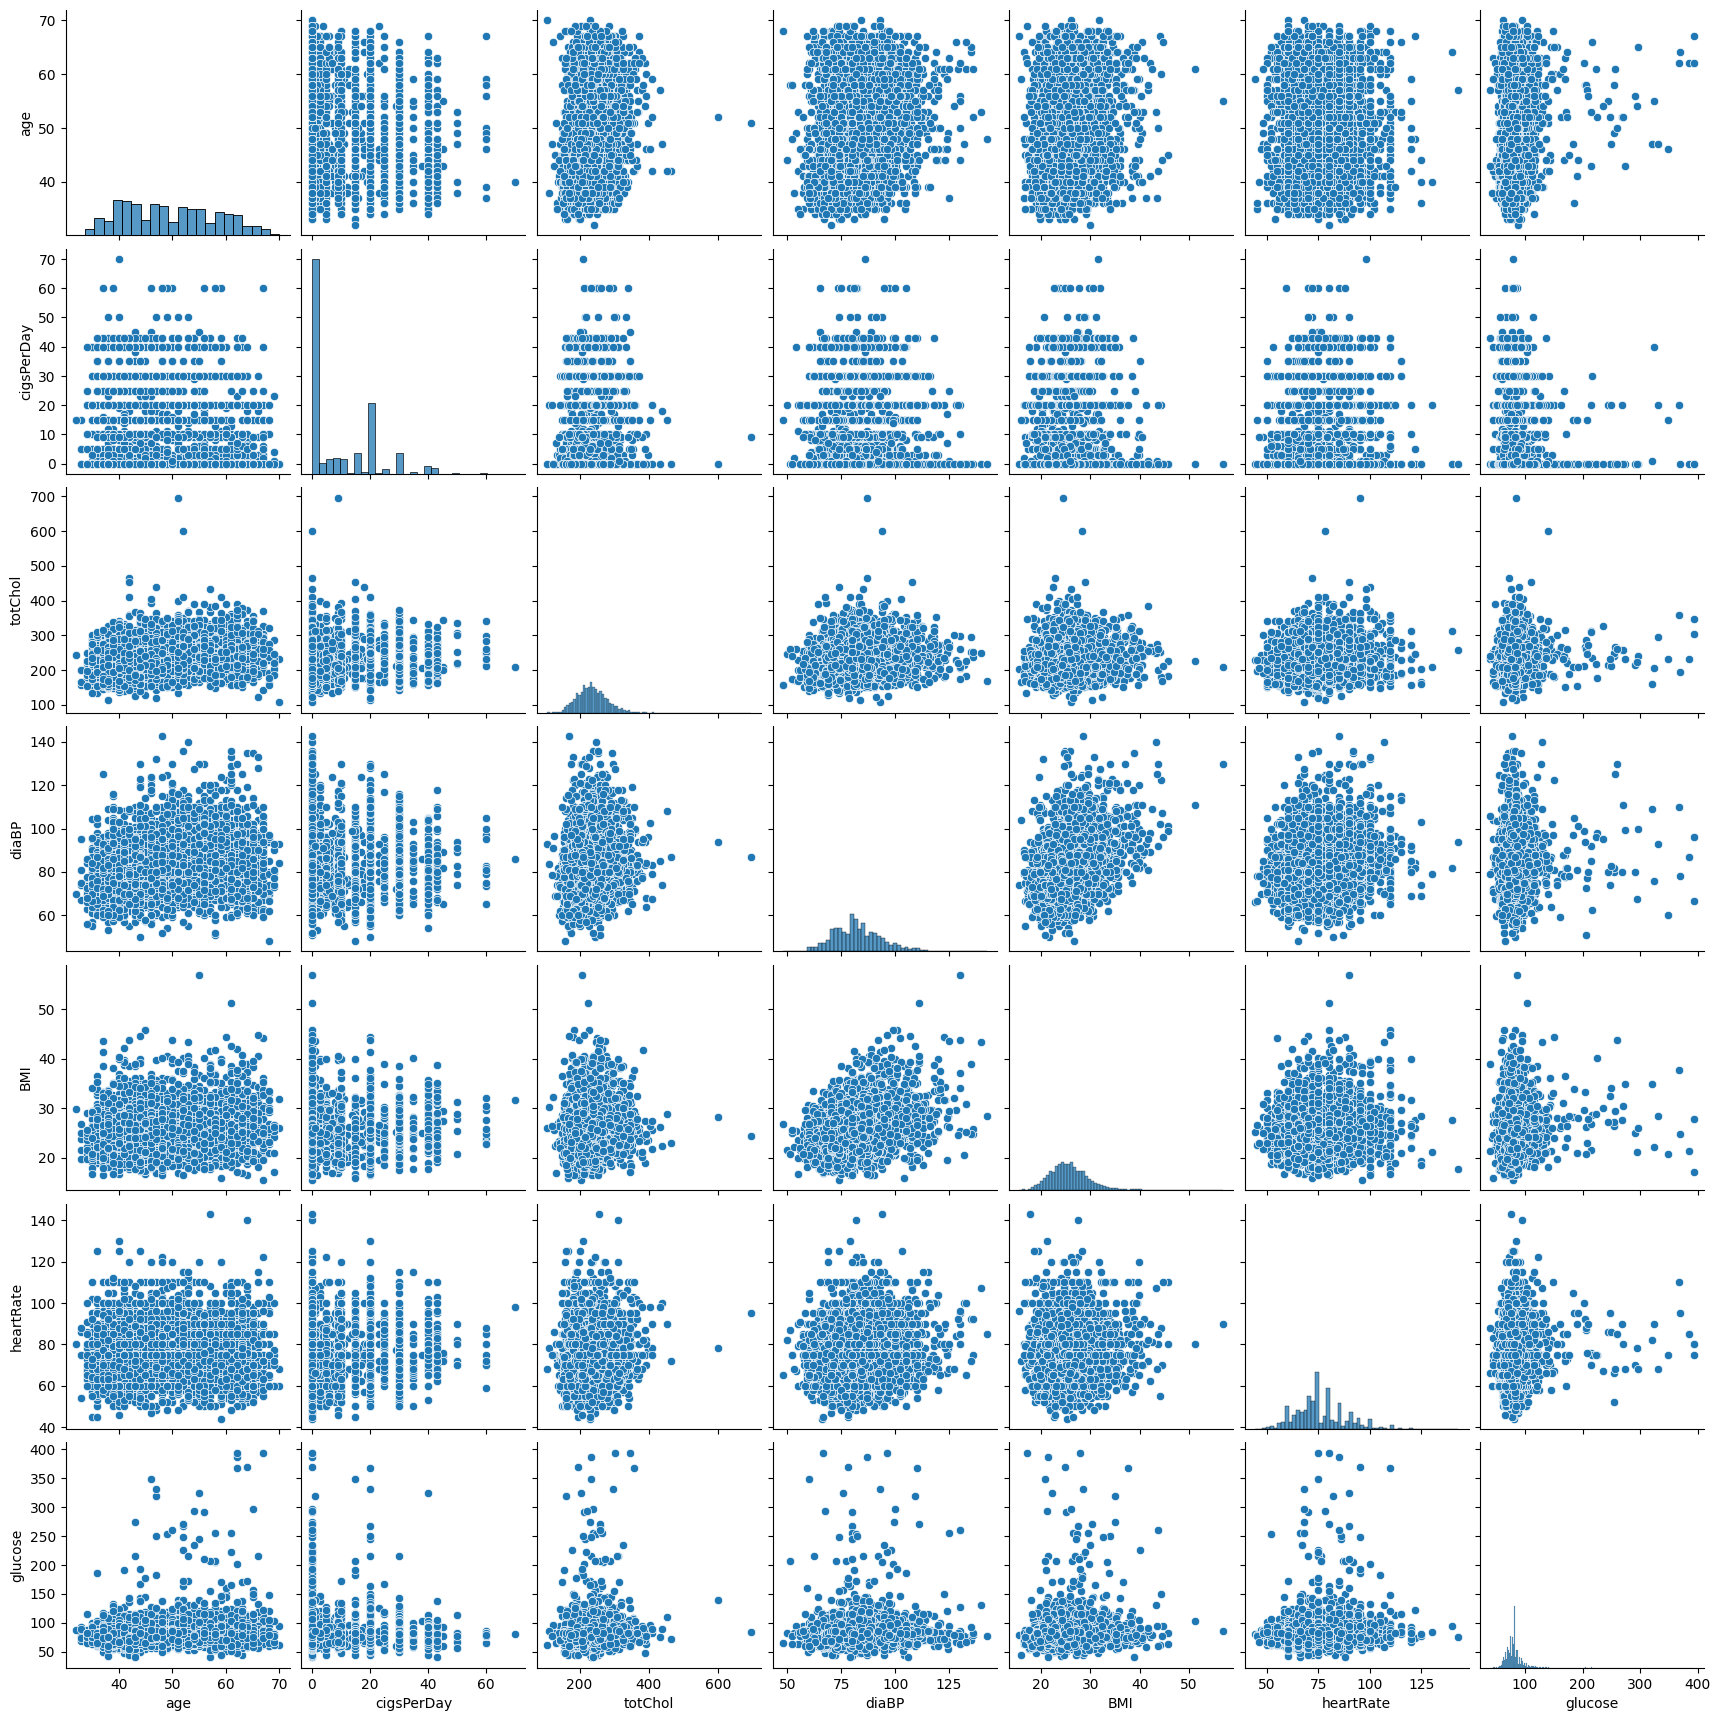

In [28]:
#Creazione di un grafico di dispersione a coppie delle colonne nel Dataset
sns.pairplot(data[['age', 'cigsPerDay', 'totChol','diaBP', 'BMI', 'heartRate', 'glucose']])

In [29]:
X = data.drop('TenYearCHD', axis = 1)
y = data['TenYearCHD']

In [30]:
X

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0
4235,0,48,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,82.0


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
#dividiamo il dataset in train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
from sklearn.linear_model import LogisticRegression

Classifier = LogisticRegression()

#adestramento modello
Classifier.fit(X_train, y_train)

In [38]:
#prevede la variabile target utilizzando il modello addestrato e i dati di test
y_test_hat = Classifier.predict(X_test)

In [39]:
#creare un DataFrame per memorizare  valori effetivi
Results = pd.DataFrame({'Actual': y_test, 'Prediction':y_test_hat})
Results.head()

,Actual,Prediction
906,0,0
857,0,0
2761,0,0
108,1,0
2894,0,0


In [41]:
from sklearn.metrics import accuracy_score

#calcolo del punteggio di accuratezza dei valori previsti
print(accuracy_score(y_test, y_test_hat))

0.8718553459119497


In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
#calcolo confusion matrix
cm = confusion_matrix(y_test, y_test_hat)
print(cm)

[[1097    9]
 [ 154   12]]


Text(50.722222222222214, 0.5, 'True Label')

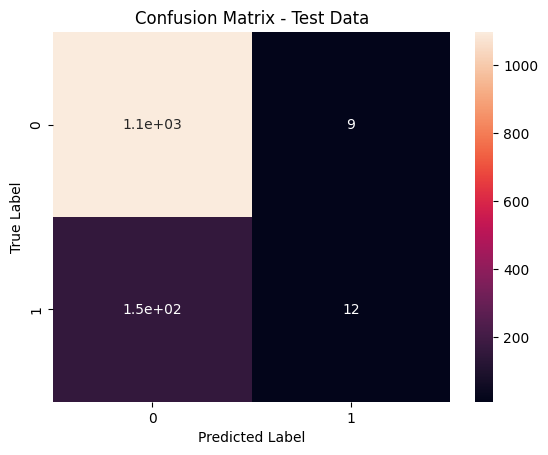

In [49]:
import seaborn as sn

#creare una heatmap utilizando la matrice di confusione con le anotazioni
sn.heatmap(cm, annot = True)

plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')